# Assignment03 20160044 Shin Dong-Ha

importing Necessary Libraries

In [109]:
import random
import math
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

class Point definition

In [110]:
class Point:
    x = float()
    y = float()
    def __init__(self, a, b):
        self.x = a
        self.y = b

Static variables(lists) Declaration

In [111]:
points = list()
centers = list()
groups = list()

DEFINE FUNCTION : Generate Point Clusters (Initialize 'points' before use it)

In [112]:
def generatePointClusters(numofClusters, numofPoints, clusterDiffusion, pointDiffusion):
    
    for x in range(numofClusters):
        xoffset = random.random()
        yoffset = random.random()
        for y in range(numofPoints):
            points.append(Point(random.random()*pointDiffusion + xoffset*clusterDiffusion, random.random()*pointDiffusion + yoffset*clusterDiffusion))
            

DEFINE FUNCTION : Compute Distance

In [113]:
def computeDistance(a, b):
    result = math.sqrt(math.pow(((a.x) - (b.x)), 2) + math.pow(((a.y) - (b.y)), 2))
    
    return result

DEFINE FUNCTION : Visualize Init Data

In [114]:
def visInitData(point_list, centerlist):

    # Create the plot object
    _, ax = plt.subplots()
    for center in list(centerlist):
        ax.scatter(center.x, center.y, s = 50, color = "k", alpha = 1)
        
    for point in list(point_list):
        ax.scatter(point.x, point.y, s = 10, color = "r", alpha = 0.75)


    # Label the axes and provide a title
    ax.set_title("Input Data")
    ax.set_xlabel("x")
    ax.set_ylabel("y")

DEFINE FUNCTION : Visualize Result Data

In [115]:
def visResultData(grouplist):

    i = 0
    j = 0

    colors = cm.rainbow(np.linspace(0, 1, len(centers)))
    _, ax = plt.subplots()
    for group in list(grouplist):
        
        ax.scatter(centers[i].x, centers[i].y, s = 50, color = "k", alpha = 1)
        for v in list(group):
            ax.scatter(v.x, v.y, s = 10, c = colors[i], alpha = 1)
            
        i += 1    
            
        # Label the axes and provide a title
        ax.set_title("Group Data")
        ax.set_xlabel("x")
        ax.set_ylabel("y")
    

DEFINE FUNCTION : Decide Center (Initialize 'centers list' before use it)

In [116]:
def decideCenter(numofClusters):
    
    for v in range(numofClusters):
            centers.append(points[v])


DEFINE FUNCTION : Decide Group (Initialize 'groups list' before use it)

In [117]:
def decideGroup(point):
    min = computeDistance(centers[0], point)
    group = 0
    i = 0
    for center in list(centers):
        if min > computeDistance(center, point):
            min = computeDistance(center, point)
            group = i
        i += 1
    groups[group].append(point)

    return min*min

DEFINE FUNCTION : Relocating Centers

In [118]:
def relocateCenter(centerlist, grouplist):
    
    centerofX = float()
    centerofY = float()
    numofPoint = int()
    numofCenter = len(centerlist)
    check = 0
    
    for count in range(numofCenter):
        centerofX = 0
        centerofY = 0
        numofPoint = 0
        for point in list(grouplist[count]):
            centerofX += point.x
            centerofY += point.y
            numofPoint += 1
        if numofPoint == 0:
            return -1
            
        centerofX /= numofPoint
        centerofY /= numofPoint
        if centerlist[count].x != centerofX:
            centerlist[count].x = centerofX
            check = 1
        if centerlist[count].y != centerofY:
            centerlist[count].y = centerofY
            check = 1
        
    return check

Main Function

1 th sum of energy : 503.2628317121934
2 th sum of energy : 45.37484864306611
3 th sum of energy : 9.963899153846146
4 th sum of energy : 9.881524578805978
5 th sum of energy : 9.881331375925203
6 th sum of energy : 9.881330918031889
7 th sum of energy : 9.881330916932495
8 th sum of energy : 9.881330916929816
9 th sum of energy : 9.881330916929802
10 th sum of energy : 9.881330916929812
11 th sum of energy : 9.881330916929807
12 th sum of energy : 9.881330916929809
13 th sum of energy : 9.881330916929805
14 th sum of energy : 9.88133091692981
15 th sum of energy : 9.88133091692981
Ended at 15 th try


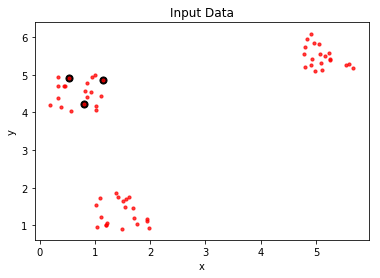

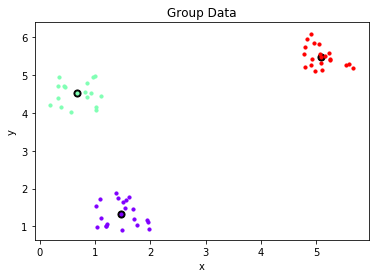

In [119]:
##CHANGE THIS VALUE TO DECIDE CLUSTER NUMBER
clusternum = 3

##CHANGE THIS VALUE TO DECIDE POINT NUMBER
pointnum = 20

##CHANGE THIS VALUE TO DECIDE HOW MUCH CLUSTERS GENERATED FAR AWAY FROM EACH OTHER
clusterdiffusion = 7

##CHANGE THIS VALUE TO DECIDE HOW MUCH POINTS GENERATED FAR AWAY FROM EACH OTHER
pointdiffusion = 1


############################# FUNCTION IMPLEMENTATION #############################

#Initialize lists as empty list
del points[:]

#generate clusters and points
generatePointClusters(clusternum, pointnum, clusterdiffusion, pointdiffusion)

#declare while condition variable and counting variable
checker = 1
counter = 0
energy_sum = 0

del centers[:]
decideCenter(clusternum)

#visualize input data(generated data)
visInitData(points, centers)

#loop until the energy becomes the minimum value
while checker != 0:
    energy_sum = 0
    del groups[:]
    
    for center in list(centers):
            groups.append([])
            
    for point in list(points):
        energy_sum += decideGroup(point)
    
    checker = relocateCenter(centers, groups)
    counter += 1
    #print Sum of Energy for each iteration
    print(counter,"th sum of energy :", energy_sum)

#visualize result data
visResultData(groups)

#print how many time the loop(k-means algorithm) worked
print("Ended at",counter,"th try")